In [1]:
file_id = '1EaCeAah3C3mtb69610bKNaG3_asx7mTy'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.zip'

!gdown {url} -O {output}

!unzip {output} -d /content/dataset


Downloading...
From (original): https://drive.google.com/uc?id=1EaCeAah3C3mtb69610bKNaG3_asx7mTy
From (redirected): https://drive.google.com/uc?id=1EaCeAah3C3mtb69610bKNaG3_asx7mTy&confirm=t&uuid=6c498f5e-faf8-4e66-806c-e58c86edbede
To: /content/dataset.zip
100% 3.56G/3.56G [00:36<00:00, 96.5MB/s]
Archive:  dataset.zip
  inflating: /content/dataset/dataset-metadata.json  
  inflating: /content/dataset/test/011f0039d82940e3abf2c82499012d4a.mp4  
  inflating: /content/dataset/test/01afbf15fc6842339c1526fb8e07e88e.mp4  
  inflating: /content/dataset/test/04843e5f5879499581d013618207fc6c.mp4  
  inflating: /content/dataset/test/05f19fc426d348f6aa5601092941d5c6.mp4  
  inflating: /content/dataset/test/098d897a612d418f97604f42d15e9211.mp4  
  inflating: /content/dataset/test/09abcbabbade464ba2d244b3e6d0c783.mp4  
  inflating: /content/dataset/test/0b0fb6ab8ae849b1af118cb3a59c5252.mp4  
  inflating: /content/dataset/test/0d8b691cb5934a418daa83a3233b750c.mp4  
  inflating: /content/dataset/tes

In [2]:
import os

# Change this if you extracted to a different folder
extract_path = '/content/dataset'

# List all files in the directory to find your CSV/Excel file
print("Files found:", os.listdir(extract_path))

Files found: ['train', 'train_labels.csv', 'test', 'test_public.csv', 'dataset-metadata.json']


In [3]:
import pandas as pd

# 1. LOAD THE DATA
# Update the filename based on Step 1 results
file_path = f'{extract_path}/train_labels.csv'
df = pd.read_csv(file_path)

# 2. PRINT ALL FEATURE NAMES
print("--- List of Features (Columns) ---")
print(df.columns.tolist())

# 3. GET A SUMMARY (Best for checking Data Types)
# This shows you which features are numbers (int/float) vs text (object)
print("\n--- Dataset Info ---")
df.info()

# 4. PREVIEW THE DATA
# See the first 5 rows to understand what the features look like
df.head()

--- List of Features (Columns) ---
['filename', 'label']

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  600 non-null    object
 1   label     600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


,filename,label
0,2bc61c5a996842b1bd3777315ca61b1e.mp4,1
1,ece535466f1f4ffdbfed4fe7beb17e91.mp4,1
2,b67933aabeb6487d89b6ffcb81a63352.mp4,1
3,e8af4d92221a4a04b20b8ae98f64c194.mp4,1
4,f07aa2d8e9df40a69a29c95115401655.mp4,1


In [4]:
import cv2
import os
import pandas as pd
import numpy as np
from tqdm import tqdm # Progress bar

# Define paths (Adjust if your folder names are slightly different)
real_path = '/content/dataset/train/real'
fake_path = '/content/dataset/train/fake'

data = []

def extract_video_features(directory, label):
    # Get list of files (limit to first 500 to save time for testing)
    files = os.listdir(directory)[:500]

    print(f"Processing {len(files)} videos from {directory}...")

    for filename in tqdm(files):
        if filename.endswith(".mp4"):
            filepath = os.path.join(directory, filename)

            # Use OpenCV to capture video metadata
            cap = cv2.VideoCapture(filepath)

            if cap.isOpened():
                # Extract simple metadata "parameters"
                width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
                height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
                fps = cap.get(cv2.CAP_PROP_FPS)
                frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)

                # Calculate Duration (in seconds)
                duration = frame_count / fps if fps > 0 else 0

                # File Size (in MB) - often vital for detecting compression artifacts
                file_size = os.path.getsize(filepath) / (1024 * 1024)

                # Bitrate (approximate)
                bitrate = (file_size * 8) / duration if duration > 0 else 0

                data.append({
                    'width': width,
                    'height': height,
                    'fps': fps,
                    'frame_count': frame_count,
                    'duration': duration,
                    'file_size_mb': file_size,
                    'bitrate': bitrate,
                    'label': label # 0 for Real, 1 for Fake
                })
                cap.release()

# Run extraction (0 = Real, 1 = Fake)
if os.path.exists(real_path) and os.path.exists(fake_path):
    extract_video_features(real_path, 0)
    extract_video_features(fake_path, 1)

    # Create the DataFrame
    df = pd.DataFrame(data)
    print("\nFeature Extraction Complete!")
    print(df.head())
else:
    print("Error: Could not find 'train/real' or 'train/fake' folders.")

Processing 300 videos from /content/dataset/train/real...


100%|██████████| 300/300 [00:00<00:00, 1025.15it/s]


Processing 300 videos from /content/dataset/train/fake...


100%|██████████| 300/300 [00:05<00:00, 51.53it/s]


Feature Extraction Complete!
    width  height     fps  frame_count  duration  file_size_mb    bitrate  \
0  1920.0  1080.0  25.000        217.0  8.680000      4.159506   3.833646   
1  1920.0  1080.0  25.000        225.0  9.000000     14.111848  12.543865   
2  1920.0  1080.0  25.000        226.0  9.040000      3.447606   3.050979   
3  1280.0   720.0  29.970        199.0  6.639973      2.177361   2.623336   
4  1280.0   720.0  23.976        203.0  8.466800      1.929616   1.823230   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  


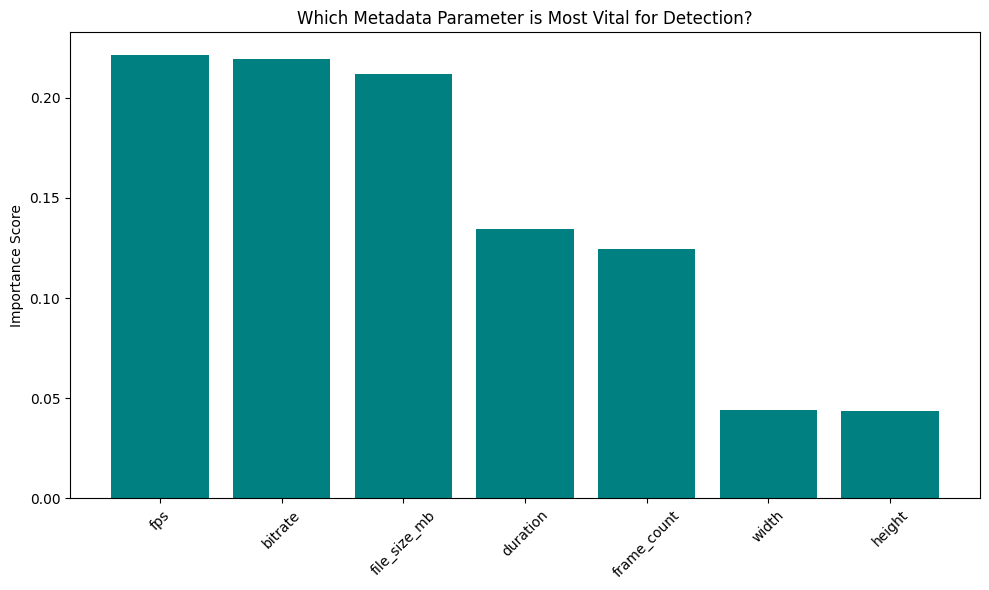


--- Ranking Results ---
fps: 0.2216
bitrate: 0.2192
file_size_mb: 0.2121
duration: 0.1347
frame_count: 0.1244
width: 0.0443
height: 0.0437


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Prepare Data
X = df.drop('label', axis=1) # The features
y = df['label']              # The target (Real vs Fake)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 3. Calculate Importance
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1] # Sort descending

# 4. Visualization
plt.figure(figsize=(10, 6))
plt.title("Which Metadata Parameter is Most Vital for Detection?")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='teal')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# 5. Print the Winner
print("\n--- Ranking Results ---")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

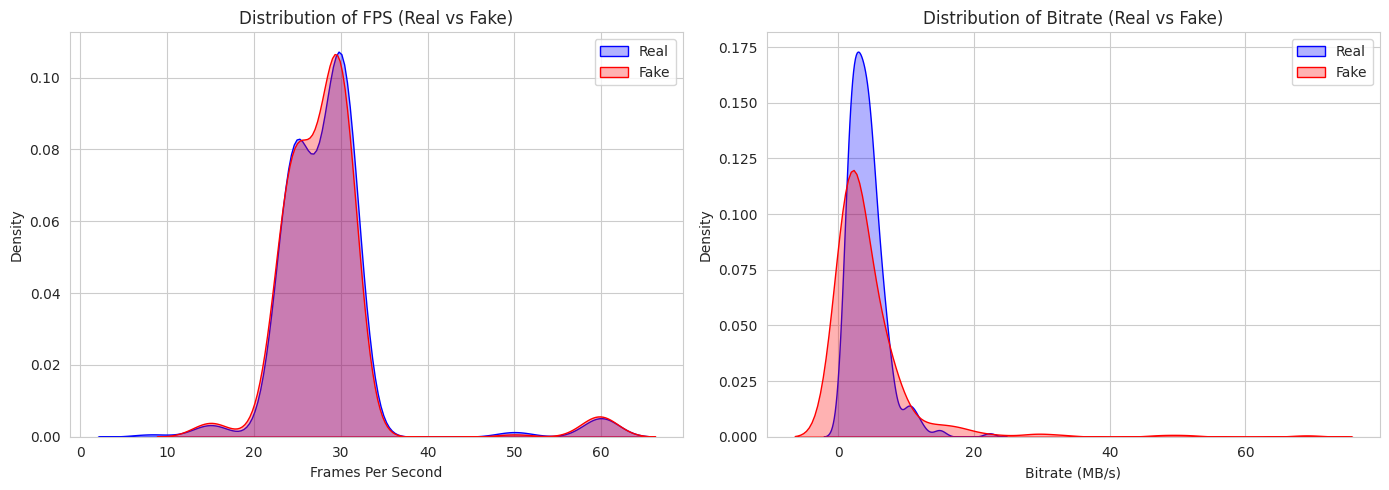

--- Average Stats ---
             fps   bitrate  file_size_mb
label                                   
0      28.402947  4.169168      4.147441
1      28.252430  4.563874      4.394649


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 5))

# 1. VISUALIZE FPS (The #1 Feature)
plt.subplot(1, 2, 1)
sns.kdeplot(data=df[df['label']==0]['fps'], label='Real', fill=True, color='blue', alpha=0.3)
sns.kdeplot(data=df[df['label']==1]['fps'], label='Fake', fill=True, color='red', alpha=0.3)
plt.title("Distribution of FPS (Real vs Fake)")
plt.xlabel("Frames Per Second")
plt.legend()

# 2. VISUALIZE BITRATE (The #3 Feature)
plt.subplot(1, 2, 2)
# We use log scale if the difference is huge, but linear is usually fine for bitrate
sns.kdeplot(data=df[df['label']==0]['bitrate'], label='Real', fill=True, color='blue', alpha=0.3)
sns.kdeplot(data=df[df['label']==1]['bitrate'], label='Fake', fill=True, color='red', alpha=0.3)
plt.title("Distribution of Bitrate (Real vs Fake)")
plt.xlabel("Bitrate (MB/s)")
plt.legend()

plt.tight_layout()
plt.show()

# 3. PRINT EXACT STATS
print("--- Average Stats ---")
print(df.groupby('label')[['fps', 'bitrate', 'file_size_mb']].mean())

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features you want to compare
features_to_analyze = [ 'fps', 'bitrate','file_size_mb']

# Group by label (0=Real, 1=Fake) and get descriptive stats
# We look at 'mean' and '50%' (median) specifically
summary = df.groupby('label')[features_to_analyze].describe()

# Display the comparison
print("Statistical Comparison (Real vs Fake):")
print(summary.T) # Transpose for easier reading

Statistical Comparison (Real vs Fake):
label                        0           1
fps          count  300.000000  300.000000
             mean    28.402947   28.252430
             std      6.427158    6.485497
             min      8.167000   15.000000
             25%     25.000000   25.000000
             50%     29.970000   29.000000
             75%     29.970000   29.970030
             max     60.000000   60.000000
bitrate      count  300.000000  300.000000
             mean     4.169168    4.563874
             std      2.684257    6.969740
             min      0.417911    0.273365
             25%      2.299720    1.283907
             50%      3.769483    2.618023
             75%      5.238203    5.436694
             max     22.299970   69.062686
file_size_mb count  300.000000  300.000000
             mean     4.147441    4.394649
             std      2.904341    6.413082
             min      0.437503    0.228943
             25%      2.268024    1.251476
             50

/tmp/ipython-input-9409578.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_str', y=feature, data=df, ax=axes[i], palette=colors)
/tmp/ipython-input-9409578.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_str', y=feature, data=df, ax=axes[i], palette=colors)
/tmp/ipython-input-9409578.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_str', y=feature, data=df, ax=axes[i], palette=colors)


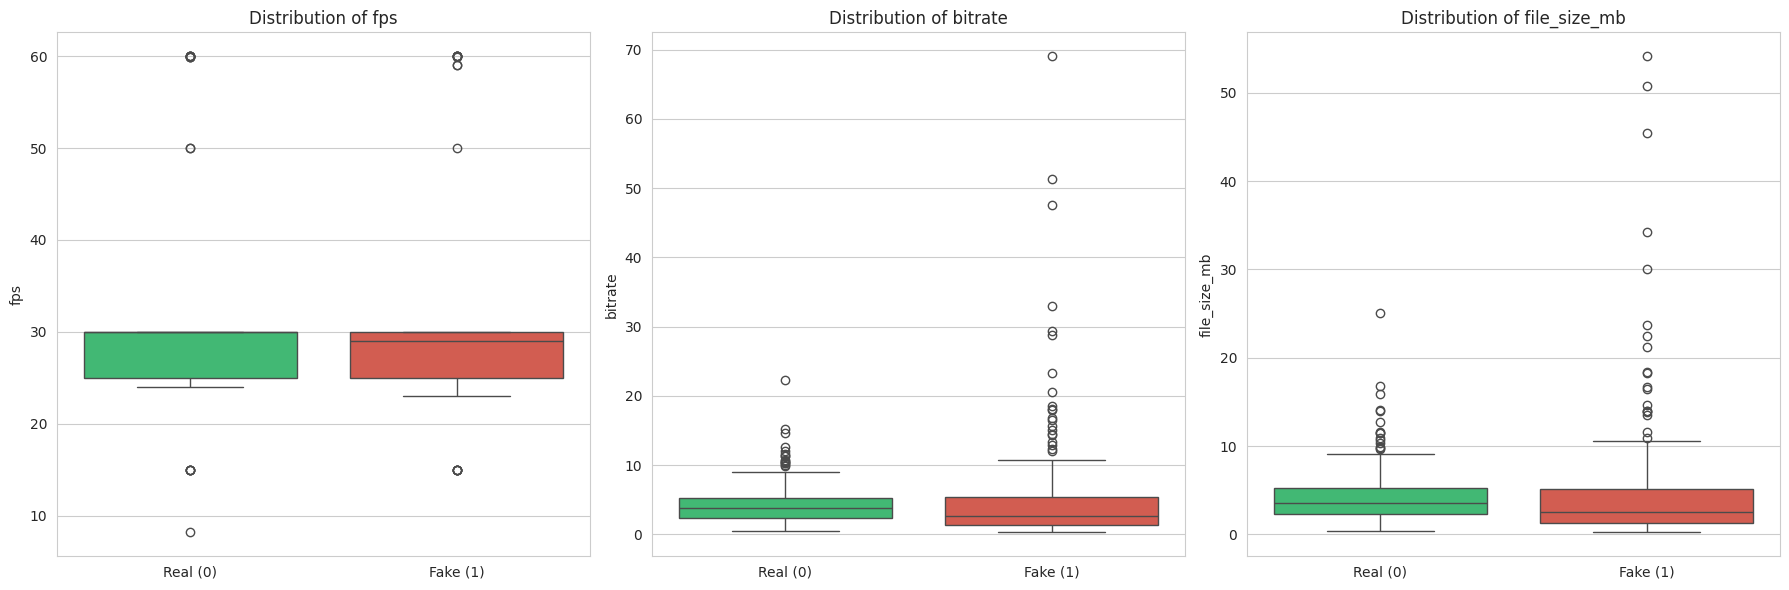

In [8]:
# Set up the plotting area (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define readable labels for the plot legend
label_map = {0: 'Real (0)', 1: 'Fake (1)'}
df['label_str'] = df['label'].map(label_map)

colors = ["#2ecc71", "#e74c3c"] # Green for Real, Red for Fake

for i, feature in enumerate(features_to_analyze):
    sns.boxplot(x='label_str', y=feature, data=df, ax=axes[i], palette=colors)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd

# 1. "Collective" Non-graph Format
# We use .agg() to show both the Mean (average) and Std (variation) side-by-side
# This confirms if Fakes actually have higher variation (std) as you suspected.
summary_table = df.groupby('label')[['fps', 'bitrate', 'file_size_mb']].agg(['mean', 'std'])

print("--- Collective Summary (Mean & Variation) ---")
print(summary_table)
print("\n")

# 2. Applying the "Initial Filter"
# Strategy: Filter for videos that exceed the 'Normal' (Real) range.
# We set a threshold: Any video with bitrate/size greater than the Average Real Video + 1 Standard Deviation
# This captures the "high value/high variation" outliers.

# Calculate thresholds based on Real (0) videos
real_videos = df[df['label'] == 0]
bitrate_threshold = real_videos['bitrate'].mean() + real_videos['bitrate'].std()
size_threshold = real_videos['file_size_mb'].mean() + real_videos['file_size_mb'].std()

print(f"Filter Thresholds -> Bitrate: >{bitrate_threshold:.2f}, File Size: >{size_threshold:.2f} MB")

# Apply the filter
# We look for videos that match the "Fake" profile (High Bitrate AND High File Size)
suspicious_filter = (df['bitrate'] > bitrate_threshold) & (df['file_size_mb'] > size_threshold)
filtered_videos = df[suspicious_filter]

# Show the results
print(f"Number of videos flagged by filter: {len(filtered_videos)}")
print("Sample of flagged videos:")
print(filtered_videos[['label', 'bitrate', 'file_size_mb']].head())

# Optional: Check how many of these are actually fake
if 'label' in filtered_videos.columns:
    accuracy = filtered_videos['label'].mean() * 100
    print(f"\nPercentage of flagged videos that are actually Fake: {accuracy:.2f}%")

--- Collective Summary (Mean & Variation) ---
             fps             bitrate           file_size_mb          
            mean       std      mean       std         mean       std
label                                                                
0      28.402947  6.427158  4.169168  2.684257     4.147441  2.904341
1      28.252430  6.485497  4.563874  6.969740     4.394649  6.413082


Filter Thresholds -> Bitrate: >6.85, File Size: >7.05 MB
Number of videos flagged by filter: 71
Sample of flagged videos:
    label    bitrate  file_size_mb
1       0  12.543865     14.111848
10      0  10.708527      9.111360
27      0   7.457256      8.016550
32      0  10.406776      9.678302
46      0  12.086037     11.543637

Percentage of flagged videos that are actually Fake: 61.97%


In [10]:
# 1. CHECK THE SPREAD (Standard Deviation)
print("--- Standard Deviation (Variance) ---")
print(df.groupby('label')[['fps', 'bitrate']].std())

# 2. CHECK THE EXACT FPS VALUES
# This usually reveals the "AI Signature"
print("\n--- FPS Counts (Real Videos) ---")
print(df[df['label']==0]['fps'].value_counts().head(10))

print("\n--- FPS Counts (Fake Videos) ---")
print(df[df['label']==1]['fps'].value_counts().head(10))

--- Standard Deviation (Variance) ---
            fps   bitrate
label                    
0      6.427158  2.684257
1      6.485497  6.969740

--- FPS Counts (Real Videos) ---
fps
29.970    114
25.000     83
30.000     45
23.976     24
24.000     13
60.000      5
15.000      5
59.940      3
50.000      2
24.975      1
Name: count, dtype: int64

--- FPS Counts (Fake Videos) ---
fps
25.000000    79
29.970030    59
29.000000    53
30.000000    49
23.976024    15
23.000000    15
24.000000    11
15.000000     6
60.000000     6
59.000000     2
Name: count, dtype: int64


In [11]:
# --- BITRATE COUNTS ---
print("\n--- Bitrate Counts (Real Videos - Top 5) ---")
# Rounding to 2 decimal places to group similar bitrates
print(df[df['label']==0]['bitrate'].round(2).value_counts().head(25))

print("\n--- Bitrate Counts (Fake Videos - Top 5) ---")
print(df[df['label']==1]['bitrate'].round(2).value_counts().head(25))


# --- FILE SIZE COUNTS ---
print("\n--- File Size Counts (Real Videos - Top 5) ---")
print(df[df['label']==0]['file_size_mb'].round(2).value_counts().head(25))

print("\n--- File Size Counts (Fake Videos - Top 5) ---")
print(df[df['label']==1]['file_size_mb'].round(2).value_counts().head(25))


--- Bitrate Counts (Real Videos - Top 5) ---
bitrate
5.95    3
2.54    3
3.99    3
4.42    3
3.54    3
5.60    3
3.03    2
3.23    2
1.61    2
5.01    2
6.89    2
3.02    2
1.70    2
1.71    2
4.70    2
3.95    2
4.06    2
2.87    2
4.40    2
3.57    2
2.10    2
1.95    2
4.52    2
5.75    2
1.88    2
Name: count, dtype: int64

--- Bitrate Counts (Fake Videos - Top 5) ---
bitrate
1.48    3
3.18    3
2.40    3
2.41    3
0.69    3
0.65    2
1.13    2
1.14    2
1.74    2
5.50    2
0.74    2
2.97    2
0.72    2
1.41    2
5.23    2
2.90    2
2.67    2
1.12    2
1.81    2
1.22    2
2.62    2
1.80    2
3.20    2
1.09    2
1.15    2
Name: count, dtype: int64

--- File Size Counts (Real Videos - Top 5) ---
file_size_mb
1.58     4
2.45     3
2.92     3
5.21     3
3.29     2
4.82     2
1.75     2
5.44     2
11.54    2
5.39     2
4.09     2
1.83     2
4.34     2
1.39     2
3.38     2
4.87     2
2.78     2
2.99     2
3.51     2
3.10     2
1.72     2
2.63     2
2.00     2
3.66     2
1.48     2
Name

In [12]:
import numpy as np

# 1. Define the "Weird Integers" (Non-standard FPS)
# These appear in your Fake list but are technically invalid for real cameras
weird_integers = [29.0, 23.0, 59.0]

# 2. Define logic for "Long Decimals"
# We check if the number is different from itself rounded to 3 places
# If (Original - Rounded) is not 0, it has extra decimal junk.
def has_long_decimal(val):
    return abs(val - round(val, 3)) > 0.000001

# --- APPLY FILTERS ---

# Condition A: It is one of the suspicious integers (29, 23, 59)
cond_weird_int = df['fps'].isin(weird_integers)

# Condition B: It has decimals beyond the 3rd place
cond_long_decimal = df['fps'].apply(has_long_decimal)

# Combine them (OR logic: if it fails either check, it's suspicious)
suspicious_fps = cond_weird_int | cond_long_decimal

# Create a filtered dataframe
flagged_videos = df[suspicious_fps]
clean_videos = df[~suspicious_fps]

# --- RESULTS ---
print(f"Total Videos: {len(df)}")
print(f"Flagged as Suspicious (Fake Pattern): {len(flagged_videos)}")
print(f"Remaining 'Clean' Videos: {len(clean_videos)}")

print("\n--- Accuracy Check ---")
# If your hypothesis is right, 'flagged_videos' should be mostly Label 1 (Fake)
if 'label' in df.columns:
    fake_percentage = flagged_videos['label'].mean() * 100
    print(f"Percentage of flagged videos that are actually FAKE: {fake_percentage:.2f}%")

    # Let's see what we caught
    print("\nSample of caught FPS values:")
    print(flagged_videos['fps'].value_counts().head(5))

Total Videos: 600
Flagged as Suspicious (Fake Pattern): 148
Remaining 'Clean' Videos: 452

--- Accuracy Check ---
Percentage of flagged videos that are actually FAKE: 100.00%

Sample of caught FPS values:
fps
29.970030    59
29.000000    53
23.976024    15
23.000000    15
59.000000     2
Name: count, dtype: int64


In [13]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # <--- NEW IMPORT

BASE_DIR = '/content/dataset'

IMG_SIZE = 112   # Resize frames to 112x112
SEQ_LENGTH = 10  # Number of frames per video

# --- LOAD CSV ---
csv_path = os.path.join(BASE_DIR, 'train_labels.csv')
df = pd.read_csv(csv_path)

# Function to get the full path based on label
def get_video_path(filename, label):
    # Map label to folder name
    subfolder = 'fake' if label == 1 else 'real'
    return os.path.join(BASE_DIR, 'train', subfolder, filename)

# Apply path construction
df['full_path'] = df.apply(lambda row: get_video_path(row['filename'], row['label']), axis=1)

# --- EXTRACT FRAMES ---
def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []

    # Calculate spacing to get exactly 10 frames spread out
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    skip = max(int(total_frames / SEQ_LENGTH), 1)

    for i in range(SEQ_LENGTH):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * skip)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
            frame = frame / 255.0 # Normalize to 0-1
            frames.append(frame)
        else:
            # Padding if video is too short/corrupt
            frames.append(np.zeros((IMG_SIZE, IMG_SIZE, 3)))

    cap.release()
    return np.array(frames)

print(f"Processing {len(df)} videos... this may take time.")

X = []
y = []

# --- MAIN LOOP WITH PROGRESS BAR ---
# We wrap df.iterrows() with tqdm to create the bar
# total=df.shape[0] helps tqdm calculate the percentage correctly
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Extracting Frames"):
    if os.path.exists(row['full_path']):
        try:
            video_seq = extract_frames(row['full_path'])
            # Only add if we got the correct number of frames
            if len(video_seq) == SEQ_LENGTH:
                X.append(video_seq)
                y.append(row['label'])
        except Exception as e:
            # use tqdm.write instead of print to avoid breaking the progress bar layout
            tqdm.write(f"Error reading {row['filename']}: {e}")
    else:
        tqdm.write(f"File not found: {row['full_path']}")

X = np.array(X)
y = np.array(y)

# Create Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nSuccess! Data shape: {X_train.shape}")

Processing 600 videos... this may take time.


Extracting Frames: 100%|██████████| 600/600 [23:26<00:00,  2.34s/it]



Success! Data shape: (480, 10, 112, 112, 3)


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model():
    model = models.Sequential()

    # 1. SPATIAL (CNN) - Runs on each of the 10 frames
    model.add(layers.TimeDistributed(
        layers.Conv2D(32, (3, 3), activation='relu'),
        input_shape=(SEQ_LENGTH, IMG_SIZE, IMG_SIZE, 3)
    ))
    model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

    model.add(layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')))
    model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

    model.add(layers.TimeDistributed(layers.Flatten()))

    # 2. TEMPORAL (LSTM) - Analyzes the sequence of 10 frames
    model.add(layers.LSTM(64, return_sequences=False))

    # 3. CLASSIFIER
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Train
model = build_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training Model...")
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=8,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training Model...
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.5028 - loss: 0.7668 - val_accuracy: 0.5167 - val_loss: 0.6939
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.4816 - loss: 0.7334 - val_accuracy: 0.5167 - val_loss: 0.6926
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.4777 - loss: 0.7038 - val_accuracy: 0.4833 - val_loss: 0.6947
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.5168 - loss: 0.6956 - val_accuracy: 0.4750 - val_loss: 0.6933
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5224 - loss: 0.6945 - val_accuracy: 0.5167 - val_loss: 0.6930
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.5153 - loss: 0.6983 - val_accuracy: 0.5167 - val_loss: 0.6930
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.4650 - loss: 0.6987 - val_accuracy: 0.5250 - val_loss: 0.6928
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.4832 - loss: 0.6953 - val_a

In [17]:
import os
import cv2
import numpy as np
import pandas as pd

# --- CONFIGURATION ---
TEST_FOLDER = '/content/dataset/test' # Update with your Test folder path
IMG_SIZE = 112
SEQ_LENGTH = 10

# --- HELPER 1: THE METADATA FILTER ---
def is_suspicious_fps(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    cap.release()

    if fps is None or fps == 0:
        return False # Can't judge, send to model

    # Condition A: Weird Integers (Deepfake defaults)
    weird_integers = [29.0, 23.0, 59.0]
    if fps in weird_integers:
        return True

    # Condition B: Long Decimal Tails (Standard is usually 2 or 3 decimals max)
    # If difference between raw and rounded is non-zero, it's suspicious
    if abs(fps - round(fps, 3)) > 0.000001:
        return True

    return False

# --- HELPER 2: FRAME EXTRACTOR (For the Model) ---
def get_model_input(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    skip = max(int(total_frames / SEQ_LENGTH), 1)

    for i in range(SEQ_LENGTH):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * skip)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
            frame = frame / 255.0
            frames.append(frame)
        else:
            frames.append(np.zeros((IMG_SIZE, IMG_SIZE, 3)))

    cap.release()
    return np.array(frames).reshape(1, SEQ_LENGTH, IMG_SIZE, IMG_SIZE, 3)

# --- MAIN LOOP ---
results = []
test_files = [f for f in os.listdir(TEST_FOLDER) if f.endswith(('.mp4', '.avi', '.mov'))]

print(f"Starting classification on {len(test_files)} test videos...")

for i, filename in enumerate(test_files):
    video_path = os.path.join(TEST_FOLDER, filename)

    # 1. TRY THE FILTER FIRST (Instant Check)
    if is_suspicious_fps(video_path):
        # Filter caught it! It's definitely fake.
        pred_prob = 1.0
        pred_label = 1
        method = "Filter"

    # 2. IF FILTER PASSES, ASK THE MODEL
    else:
        try:
            # Prepare frames
            input_frames = get_model_input(video_path)

            # Predict
            prob = model.predict(input_frames, verbose=0)[0][0]

            pred_prob = float(prob)
            pred_label = 1 if prob > 0.5 else 0
            method = "Model"

        except Exception as e:
            print(f"Error processing {filename}: {e}")
            pred_prob = 0.5 # Fallback if file is corrupt
            pred_label = 0
            method = "Error"

    # Log progress every 50 videos
    if i % 50 == 0:
        print(f"Processed {i}/{len(test_files)}... Last method: {method}")

    results.append({
        'filename': filename,
        'label': pred_label,
        'probability': pred_prob
    })

# --- SAVE SUBMISSION ---
submission_df = pd.DataFrame(results)

# Reorder columns as requested
submission_df = submission_df[['filename', 'label', 'probability']]

save_path = 'submission_v4.csv'
submission_df.to_csv(save_path, index=False)

print(f"\nDone! Saved to {save_path}")
print(submission_df.head())

Starting classification on 200 test videos...
Processed 0/200... Last method: Model
Processed 50/200... Last method: Model
Processed 100/200... Last method: Model
Processed 150/200... Last method: Filter

Done! Saved to submission_v4.csv
                               filename  label  probability
0  4b954e01331b4b54828ab45b4e3a6e6f.mp4      0     0.499798
1  68d3e8ed53844e1a8038624c49a44c9d.mp4      0     0.499796
2  4091eb76f55b4326aa79a4798b44d49b.mp4      1     1.000000
3  f802bf7ca591410c831e34f4b772eec1.mp4      1     1.000000
4  ef85e642ade7495d8e5552d05ba27bc0.mp4      0     0.499796
